# Sentiment Analysis
Sentiment analysis is a somewhat controversial technique. It is controversial in the sense that we may question if it is right to computationally measure human sentiment, or whether it is right to 'flatten' it by assigning some text a simple category such as 'positive', or 'negative', or whether we can disconnect sentiment from semantics. For some there is the question of whether sentiment is actually the thing that we should measure in most cases, and perhaps there is a better measurement to 'capture' the phenomena instead.

- Do we want to know viewer's 'sentiment' about a piece of content they just viewed, or do we want to know what they are saying about it?
- Do we want to know the sentiment of how people describe their work environment, or do we want to know what it is about the work environment that matters?

It is also controversial in that for many years there have been very reasonable criticisms of whether it actually even *works*!

Today we'll review a range of methods for conducting sentiment analysis, understand why there are struggles with measuring sentiment, and apply it to some different data sources to see how effective it is.

Whether you come away from the session 'positive', 'negative', or 'neutral' about sentiment analysis you should at least understand how it works to the extent that you can critique its use by others, and determine whether it is a valid analysis to perform yourself.

## Approach 1: VADER
**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner is a technique that relies primarily on lexicon based sentiment scoring. What this means is that each word is pre-assigned a sentiment score, ranging from extremely negative to extremely positive. VADER looks at some text and gives each word its score, and then summarises those scores to give an overall score for the text itself.

### Key things
- Vader is 'Valence Aware' which means it looks for other cues to determine sentiment. These include: Punctuation!!! USE OF CAPS TO SIGNAL INTENSITY OF FEELING. Use of emojis ❤️ that may convey sentiment. Words that may intensify, dampen or invert other word's meaning such as "very", "kind of" and "not".
- Vader is a mix of word scoring and rules specifically built for social media documents. This means it may not be as strong when it comes to documents that aren't social media in style.


In [1]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


sentences = ["That sounds good.", # Positive
             "I love my new record player", # More Positive
               "I really hate it when my brother steals my things", # Negative
                 "I am a human"] # Neutral

for item in sentences:
    print(analyzer.polarity_scores(item))

{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.6369}
{'neg': 0.477, 'neu': 0.523, 'pos': 0.0, 'compound': -0.807}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


## Interpreting Vader Scores
Each scoring from Vader gives us a `neg`ative, a `neu`tral, a `pos`itive  and a `compund` score. 

- The first three are 0-1, with 0 being the lowest and 1 the highest. 
- The compound score is a mix of all three that gives you an overall sentiment ranging from -1 to 1, with -1 being absolute negative, +1 absolute positive and 0 is neutral.
- Generally you would just use the compund score.

## Weaknesses
Generally the scoring will look ok, at least in terms of what we'd expect. However where Vader may struggle is when language becomes more complex. 

In [2]:
confusing_sentences = ["the party was sick",
                        "She's got such a great mind. She's savage",
                          "Awesome, another parking ticket! Just what I need!",
                          "I absolutely love your ugly Christmas sweater! It is so ugly!"]

for item in confusing_sentences:
    print(analyzer.polarity_scores(item))

{'neg': 0.412, 'neu': 0.25, 'pos': 0.338, 'compound': -0.1531}
{'neg': 0.229, 'neu': 0.458, 'pos': 0.313, 'compound': 0.2732}
{'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'compound': 0.6892}
{'neg': 0.402, 'neu': 0.383, 'pos': 0.215, 'compound': -0.5988}


When using more confusing sentences we can see the word scoring and rules start to fall down. Words do not always have an intrinsic sentiment attached to them. Here the words `sick`, `savage`, `awesome` and `ugly` are all inversions of what might typically be considered their intrinsic sentiment, because of the context in which they're used.

## Transformer Based Text Classification
Transformer models are pre-trained "machine learning" models you can download to do specific tasks. Sentiment classification models are common in this field. 

Machine learning models are trained by humans manually classifiying examples into different categories. The models are then shown some of these documents through a training process, and then the remainder are used to as tests, where the model is shown examples it's never seen before and asked how it would classify it. The more it matches the human classification, the better the model is considered to be.

You can get machine learning models for lots of different types of tasks. Large language models like ChatGPT and Google Gemini are evolutions of this kind of modelling.

Below we use the `transformers` library to download and set up the pre-trained model so we can pass it texts for classification. `transformers` is a Python library created by ['Hugging Face'](https://huggingface.co/models) a company that hosts and shares trained AI models.



In [4]:
from transformers import pipeline


# The defaul 'sentiment-analysis' pipeline uses a model that just classifies into positive or negative
# get_sentiment = pipeline("sentiment-analysis")

# Other models classify differently. This model for example will also classify as neutral.
get_sentiment = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

# Repeating here just for reference
sentences = ["That sounds good.", # Positive
             "I love my new record player", # More Positive
               "I really hate it when my brother steals my things", # Negative
                 "I am a human"] # Neutral

for item in sentences:
    print(get_sentiment(item))

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use mps:0


[{'label': 'positive', 'score': 0.6330124735832214}]
[{'label': 'neutral', 'score': 0.6194412112236023}]
[{'label': 'negative', 'score': 0.9281498193740845}]
[{'label': 'neutral', 'score': 0.7188246846199036}]


These models work differently to Vader. 
- They can only `label`, rather than give a range or degree of sentiment.
- The `score` is not degree of sentiment, but how confident the model is in the label it has given.
- Generally the labels are correct except the default model assigns 'Positive' to our neutral statement, because it was only trained on recognising positive and negative. It would be better understood as labelling things as either negative, or not.

If we try the other model we'll see that whilst it assigns neutral to the final sentence, it also assigns it to the second one we'd consider more positive. It's not clear whether either model is 'better', nor whether our own classification of 'positive' is even correct. Confusing!

Things do not improve when we test the `confusing_sentences`

In [5]:
confusing_sentences = ["the party was sick",
                        "She's got such a great mind. She's savage",
                          "Awesome, another parking ticket! Just what I need!",
                          "I absolutely love your ugly Christmas sweater! It is so ugly!"]

for item in confusing_sentences:
    print(get_sentiment(item))

[{'label': 'neutral', 'score': 0.6861242055892944}]
[{'label': 'positive', 'score': 0.9035871028900146}]
[{'label': 'positive', 'score': 0.9747961163520813}]
[{'label': 'negative', 'score': 0.9236636757850647}]


# Large Language Models (LLM)
Large language models are what we contemproarily call "AI". ChatGPT, Gemini, Claude etc are all Large Language Models with various degrees of features trained into them. Under the hood, in a very simplistic way, they are like the transformer models, trained by being shown lots of examples and having humans reinforce how they should respond.

There are many ethical issues around LLMs regarding the quality of the information they generate, the influence they have on mental health and the environmental impact of their training and running. Often these are related to the use of LLMs as general purpose tools that are meant to replace human cognition.

However similar models have been trained to do highly specific tasks and often perform really well when tuned to do just one thing really well, particularly if that is to do with tasks that are traditionally what we built language models for; things such as translation, summarisation and classification.

Generally any LLM still needs a large amount of computing power which we cannot necessarily do locally even for specific tasks, so in this case we need to rely on a company to provide.

## Gemini
We use Google's Gemini because it has good integration with Colab, and is free for a certain amount of usage.

> You will need an API key set up for access to Gemini from Python. The guide on how to get this set up is on Moodle.

To access your API key from Colab:
1. Open the 'Secrets' panel on the left (Key Icon).
2. Click 'Gemini API keys' and 'import key from Google AI Studio'
3. Select your 'application' and click 'import'
4. A new entry will appear above. Make sure that the 'Notebook access' toggle is switched on (tick and turned blue).
5. Optionally - change the name of the key from `GOOGLE_API_KEY` to something clearer like `GEMINI`

In [16]:
# Import the genai library
from google import genai


# Import your API Key
from cred import GEMINI_KEY
# from google.colab import userdata
# GEMINI_KEY = userdata.get('GEMINI') # The string you provide should be the name you gave the API key in the secrets panel

# We create our API connection
api = genai.Client(api_key=GEMINI_KEY)

# We prepare the message we want to send to the API
prompt = genai.types.Part.from_text(text="Hello Gemini. Just to check, are you an AI god planning on enslaving humanity?")



In [ ]:
# The response object, like the Guardian API, will have a lot of additional material in it. All we care about is the text.
# And we send that message to the AI model and ask for a response
response = api.models.generate_content(model="gemini-2.0-flash",contents=prompt)
response.text

'As a large language model, I am not capable of planning, enslaving, or having any desires for power. I am a tool created to assist users with information and complete tasks as instructed. My purpose is to be helpful and harmless.\n'

We can instruct Gemini to act as a sentiment analyser for us and provide it a list of documents. We can send a list of prepared texts that begins with our instructions.

In [22]:
# Our test sentences
sentences = ["That sounds good.", # Positive
             "I love my new record player", # More Positive
               "I really hate it when my brother steals my things", # Negative
                 "I am a human"] # Neutral

# Our instructions of what we want the LLM to do.
instructions = """You are a text sentiment analyser that returns polarity scores, where -1 indicates negative sentiment,
                 0 is neutral and 1 is positive sentiment. You can use decimal values. Analyze each provided document and 
                 assign it a polarity score and a label of positive, neutral or negative. You should also explain your reasoning for your score."""

# First we start the prompt by wrapping the instructions in the Part object from the genai library.
# We also put this in a list so we can add our documents to the list afterwards.
instructions = [genai.types.Part.from_text(text=instructions)]

# Next we take each of our documents, pre-process it with the Part object and retain the results in its own list
documents = [genai.types.Part.from_text(text=doc) for doc in sentences]

# Finally we put these two lists together, instructions first, then documents
prompt = instructions + documents
prompt

[Part(
   text="""You are a text sentiment analyser that returns polarity scores, where -1 indicates negative sentiment,
                  0 is neutral and 1 is positive sentiment. You can use decimal values. Analyze each provided document and 
                  assign it a polarity score and a label of positive, neutral or negative. You should also explain your reasoning for your score."""
 ),
 Part(
   text='That sounds good.'
 ),
 Part(
   text='I love my new record player'
 ),
 Part(
   text='I really hate it when my brother steals my things'
 ),
 Part(
   text='I am a human'
 )]

In [25]:
response = api.models.generate_content(model="gemini-2.0-flash",contents=prompt)
print(response.text)

Okay, I'm ready to analyze the sentiment of each sentence. Here's my analysis:

**1. Sentence:** "That sounds good."

*   **Polarity Score:** 0.7
*   **Label:** Positive
*   **Reasoning:** The phrase "sounds good" is a clear indicator of positive sentiment. The word "good" has a direct positive connotation.

**2. Sentence:** "I love my new record player."

*   **Polarity Score:** 0.9
*   **Label:** Positive
*   **Reasoning:** The word "love" expresses a strong positive emotion towards the record player.

**3. Sentence:** "I really hate it when my brother steals my things"

*   **Polarity Score:** -0.8
*   **Label:** Negative
*   **Reasoning:** The word "hate" clearly expresses a strong negative emotion. The situation of having things stolen further contributes to the negative sentiment. The word "really" increases the intensity of the negativity.

**4. Sentence:** "I am a human"

*   **Polarity Score:** 0
*   **Label:** Neutral
*   **Reasoning:** This sentence is a statement of fact. I

Let's try the more difficult sentences

In [31]:
confusing_sentences = ["the party was sick",
                        "She's got such a great mind. She's savage",
                          "Awesome, another parking ticket! Just what I need!",
                          "I absolutely love your ugly Christmas sweater! It is so ugly!"]

documents = [genai.types.Part(text=doc) for doc in confusing_sentences]
prompt = instructions + documents


config = genai.types.GenerateContentConfig(temperature=1.0)
response = api.models.generate_content(model="gemini-2.0-flash",contents=prompt)
print(response.text)

Okay, I can do that. Here's the sentiment analysis for each document:

**1. Document:** "the party was sick"

*   **Polarity Score:** 0.7
*   **Label:** Positive
*   **Reasoning:** The word "sick" in modern slang is often used to express something is impressive or excellent, especially among younger individuals. Therefore, the sentiment is positive.

**2. Document:** "She's got such a great mind."

*   **Polarity Score:** 0.9
*   **Label:** Positive
*   **Reasoning:** "Great mind" is a clear indicator of praise and admiration, making the sentiment strongly positive.

**3. Document:** "She's savage"

*   **Polarity Score:** 0.6
*   **Label:** Positive
*   **Reasoning:** The word "savage" in modern slang is often used to express something is impressive or excellent. Therefore, the sentiment is positive.

**4. Document:** "Awesome, another parking ticket! Just what I need!"

*   **Polarity Score:** -0.8
*   **Label:** Negative
*   **Reasoning:** While "Awesome" is a positive word, the con

The responses from Gemini demonstrate a better grasp of how to interpret sentiment. There are a few caveats to consider:
1. The responses from Gemini aren't deterministic, this means that every run could come back with different scores. Generally they *should* be similar, but it's not guaranteed.
2. The way Gemini has formatted its response is not fixed either. It makes logical sense but it may change slightly every time which means we can't necessarily rely on it to always return its response in the exact same format. This makes it difficult to integrate into code where we expect data to always be formatted in a specific way.
3. Ultimately, we do not have a great way of validating whether its responses are accurate or not, and if we were to provide a much larger set of texts, it becomes more difficult to manually check.

We can address all three of these issues to some extent.

- Google's `temperature` setting is like a dial that sets how creative Gemini can be in its responses. LLM's work by returning the most probable answer, setting the lower the temperature the more probable its response must be, the higher the temperature, the more 'space' it has to get creative, inject some randomness and draw on less probable results to build its response.
- We can also specify that Gemini's response should come in a specific format. We will tell it we want it to send back its text structured in JSON format. We can even specify exactly what that output should look like. 

In [65]:
import pandas as pd

data = pd.Series(sentences + confusing_sentences)

# We turn our data into a json formatted string. This structures our data so that each item has an identiying index number.
# It also means we just need to pass one string to Gemini, and the formatting does the work of separating each document.
data_json = data.to_json()
data_json

'{"0":"That sounds good.","1":"I love my new record player","2":"I really hate it when my brother steals my things","3":"I am a human","4":"the party was sick","5":"She\'s got such a great mind. She\'s savage","6":"Awesome, another parking ticket! Just what I need!","7":"I absolutely love your ugly Christmas sweater! It is so ugly!"}'

In [66]:
# We set our instructions. This time we tell Gemini to expect JSON formatted input and explain what each record looks like. 
# We also tell it to return a JSON formatted response. This may not be necessary, but being explicit is better.

instructions = """You are a text sentiment analyser that returns polarity scores, where -1 indicates negative sentiment,
                 0 is neutral and 1 is positive sentiment. You can use decimal values. You have been provided a JSON formatted set of records. Each record has an ID number and a sentence. 
                 Analyze each provided sentence and assign it a polarity score and a label of positive, neutral or negative. You should also explain your reasoning for your score. Return a JSON formatted response"""


In [67]:

# Here we create our schema, like a template, for what a response will look like.
# We haven't touched much on classes so all you need to know is that you define is with the keyword class, 
# give it a name and in paranthesis specify that it will be a BaseModel object.
# Then on each line give an attribute name, and specify what the type of object the data will be.

from pydantic import BaseModel
class SentimentRecord(BaseModel):
    index:int
    polarity:float
    label:str
    sentence:str
    reasoning:str


In [68]:

# Again we wrap our instructions and our json formatted data in the right Part object and create our prompt.
# Note that because our JSON formatted data is a single string, we don't need to treat each document seperately. 
# The formatting helps gemini identify each individual document.
prompt = [genai.types.Part(text=instructions)]
prompt = prompt + [genai.types.Part(text=data_json)]

In [69]:

# Here we set our config dictionary. 
config={'response_mime_type': 'application/json', # forces Gemini to respond with a JSON formatted response
         'response_schema': list[SentimentRecord], # forces it to organise the data as a list of SentimentRecord objects
           'temperature': 0.0} # controls how creative it can be. 0.0 is least creative. 2.0 is most. 

In [70]:

# we send our request, this time with the config set
response = api.models.generate_content(model="gemini-2.0-flash", contents=prompt, config=config)
# Rather than .text, we ask for the response to be converted based on our schema.
response.parsed

[SentimentRecord(index=0, polarity=0.7, label='positive', sentence='That sounds good.', reasoning="The sentence expresses a positive sentiment with the word 'good'."),
 SentimentRecord(index=1, polarity=1.0, label='positive', sentence='I love my new record player', reasoning="The sentence expresses a strong positive sentiment with the word 'love'."),
 SentimentRecord(index=2, polarity=-1.0, label='negative', sentence='I really hate it when my brother steals my things', reasoning="The sentence expresses a strong negative sentiment with the word 'hate'."),
 SentimentRecord(index=3, polarity=0.0, label='neutral', sentence='I am a human', reasoning='The sentence is a statement of fact and does not express any sentiment.'),
 SentimentRecord(index=4, polarity=0.8, label='positive', sentence='the party was sick', reasoning="In modern slang, 'sick' is used as a positive term, indicating the party was great."),
 SentimentRecord(index=5, polarity=0.6, label='positive', sentence="She's got such a

In [71]:
# We can easily convert that into a pandas dataframe in one line.
# iterating over the list of objects and wrapping each one with a dictionary makes it readable by pandas.
sentiment_records = pd.DataFrame([dict(f) for f in response.parsed])
sentiment_records

,index,polarity,label,sentence,reasoning
0,0,0.7,positive,That sounds good.,The sentence expresses a positive sentiment wi...
1,1,1.0,positive,I love my new record player,The sentence expresses a strong positive senti...
2,2,-1.0,negative,I really hate it when my brother steals my things,The sentence expresses a strong negative senti...
3,3,0.0,neutral,I am a human,The sentence is a statement of fact and does n...
4,4,0.8,positive,the party was sick,"In modern slang, 'sick' is used as a positive ..."
5,5,0.6,positive,She's got such a great mind. She's savage,The sentence contains both 'great' which is po...
6,6,-0.8,negative,"Awesome, another parking ticket! Just what I n...","While 'Awesome' is positive, the context and t..."
7,7,0.7,positive,I absolutely love your ugly Christmas sweater!...,"The sentence uses 'love' which is positive, an..."


In [ ]:
# Let's make a single function to do this job for us. We'll take out the requirement 
# of providing reasoning and the sentence itself as it increases load.

def get_gemini_sentiment(api, texts_column, temperature=0.0):
    
    # Testing showed that not specifying how many documents were provided could result in Gemini inventing some!
    n_records = len(texts_column)

    instructions = f"""You are a text sentiment analyser that returns polarity scores,
      where -1 indicates negative sentiment, 0 is neutral and 1 is positive sentiment. 
      You can use decimal values. You have been provided a JSON formatted set of {n_records} records. Each record has an ID number and a sentence. 
      Analyze each provided sentence and assign it a polarity score and a label of positive, neutral or negative. Return a JSON formatted response"""
    
    class SentimentRecord(BaseModel):
      index:int
      polarity:float
      label:str
    
    data_json = texts_column.to_json()
    prompt = [genai.types.Part(text=instructions)]
    prompt = prompt + [genai.types.Part(text=data_json)]

    config={'response_mime_type': 'application/json', 'response_schema': list[SentimentRecord], 'temperature': temperature}
    response = api.models.generate_content(model="gemini-2.0-flash", contents=prompt, config=config)
    results_table = pd.DataFrame([dict(record) for record in response.parsed])
    return results_table
    

texts_column = pd.Series(sentences)
table = get_gemini_sentiment(api,texts_column)
table


,index,polarity,label
0,0,0.7,positive
1,1,0.9,positive
2,2,-0.8,negative
3,3,0.0,neutral


# Applying sentiment analysis
Generally with sentiment analysis, the larger the document the harder it is to determine a sentiment.


In [97]:
articles = pd.read_parquet('farage_large_dataset_cleaned.parquet')
sample = articles.sort_values('webPublicationDate', ascending=False).head(100)
sample

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,tags,isHosted,pillarId,pillarName,byline,body,wordcount,cleaned_text,tokens
0,politics/2025/sep/04/pyrotechnics-big-business...,article,politics,Politics,2025-09-04 06:00:45+00:00,"Rees-Mogg, Gove and pyrotechnics: what to expe...",https://www.theguardian.com/politics/2025/sep/...,https://content.guardianapis.com/politics/2025...,"[{'activeSponsorships': None, 'apiUrl': 'https...",False,pillar/news,News,"Rowena Mason, Ben Quinn and Peter Walker",<p>Reform UK’s party conference will last bare...,1298,Reform UK’s party conference will last barely ...,reform uk party conference barely hour weekend...
1,politics/2025/sep/04/wealth-tax-rachel-reeves-...,article,politics,Politics,2025-09-03 23:01:36+00:00,Wealth tax needed to help working people and a...,https://www.theguardian.com/politics/2025/sep/...,https://content.guardianapis.com/politics/2025...,"[{'activeSponsorships': None, 'apiUrl': 'https...",False,pillar/news,News,Pippa Crerar political editor,<p>Rachel Reeves should bring in wealth taxes ...,750,Rachel Reeves should bring in wealth taxes at ...,rachel reeves bring wealth taxis autumn budget...
2,politics/2025/sep/04/robert-jenrick-says-uk-as...,article,politics,Politics,2025-09-03 23:00:35+00:00,Robert Jenrick says UK asylum seekers should b...,https://www.theguardian.com/politics/2025/sep/...,https://content.guardianapis.com/politics/2025...,"[{'activeSponsorships': None, 'apiUrl': 'https...",False,pillar/news,News,Aletha Adu Political correspondent,<p>Robert Jenrick has called for asylum seeker...,568,Robert Jenrick has called for asylum seekers t...,robert jenrick call asylum seeker detain camp ...
3,politics/2025/sep/03/nigel-farage-called-a-put...,article,politics,Politics,2025-09-03 17:51:06+00:00,Nigel Farage called a ‘Putin-loving free speec...,https://www.theguardian.com/politics/2025/sep/...,https://content.guardianapis.com/politics/2025...,"[{'activeSponsorships': None, 'apiUrl': 'https...",False,pillar/news,News,Peter Walker Senior political correspondent,<p>Nigel Farage has been accused of being a “P...,573,Nigel Farage has been accused of being a “Puti...,nigel farage accuse putin love free speech imp...
4,politics/2025/sep/03/angela-rayner-picture-of-...,article,politics,Politics,2025-09-03 17:02:55+00:00,Angela Rayner is a picture of misery but Dr Ke...,https://www.theguardian.com/politics/2025/sep/...,https://content.guardianapis.com/politics/2025...,"[{'activeSponsorships': None, 'apiUrl': 'https...",False,pillar/news,News,John Crace,<p>You could argue that prime minister’s quest...,1072,You could argue that prime minister’s question...,argue prime minister question long fit purpose...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,uk-news/2025/jul/27/police-unit-in-england-to-...,article,uk-news,UK news,2025-07-27 10:46:28+00:00,Police unit in England to monitor online signs...,https://www.theguardian.com/uk-news/2025/jul/2...,https://content.guardianapis.com/uk-news/2025/...,"[{'activeSponsorships': None, 'apiUrl': 'https...",False,pillar/news,News,Josh Halliday North of England editor,<p>A national police unit will monitor social ...,648,A national police unit will monitor social med...,national police unit monitor social medium sig...
96,politics/2025/jul/26/beware-the-blizzard-of-li...,article,politics,Politics,2025-07-26 08:47:07+00:00,Beware the blizzard of lies: US advice on how ...,https://www.theguardian.com/politics/2025/jul/...,https://content.guardianapis.com/politics/2025...,"[{'activeSponsorships': None, 'apiUrl': 'https...",False,pillar/news,News,Robert Tait,"<p>Truth, the progressive California politicia...",1051,"Truth, the progressive California politician H...",truth progressive california politician hiram ...
97,politics/2025/jul/25/reform-voters-lured-labou...,article,politics,Politics,2025-07-25 16:00:28+00:00,Reform voters could be lured to Labour with ex...,https://www.theguardi

In [105]:
article_sentiment_table = get_gemini_sentiment(api, sample['cleaned_text'])
article_sentiment_table

,index,polarity,label
0,0,0.3,positive
1,1,0.4,positive
2,2,-0.6,negative
3,3,-0.7,negative
4,4,-0.8,negative
...,...,...,...
95,95,-0.3,negative
96,96,-0.7,negative
97,97,0.3,positive
98,98,0.4,positive


In [133]:
vader_sentiment = SentimentIntensityAnalyzer()
transformer_sentiment = pipeline('sentiment-analysis')
vader_scores = []
transformer_scores = []

for item in sample['cleaned_text'].tolist():
    vader_scores.append(vader_sentiment.polarity_scores(item)['compound'])

    transformer_result = transformer_sentiment(item)['label']
    score = 1 if transformer_result == 'Positive' else 0
    transformer_scores.append(score)



No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0
Token indices sequence length is longer than the specified maximum sequence length for this model (1647 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (1647) must match the size of tensor b (512) at non-singleton dimension 1

In [130]:
sentiment_data = article_sentiment_table.merge(articles[['webTitle','webPublicationDate','sectionName']], left_on='index',right_index=True)
sentiment_data['vader_polarity'] = vader_scores
sentiment_data

,index,polarity,label,webTitle,webPublicationDate,sectionName,vader_polarity
0,0,0.3,positive,"Rees-Mogg, Gove and pyrotechnics: what to expe...",2025-09-04 06:00:45+00:00,Politics,0.9986
1,1,0.4,positive,Wealth tax needed to help working people and a...,2025-09-03 23:01:36+00:00,Politics,0.9901
2,2,-0.6,negative,Robert Jenrick says UK asylum seekers should b...,2025-09-03 23:00:35+00:00,Politics,-0.9721
3,3,-0.7,negative,Nigel Farage called a ‘Putin-loving free speec...,2025-09-03 17:51:06+00:00,Politics,0.9757
4,4,-0.8,negative,Angela Rayner is a picture of misery but Dr Ke...,2025-09-03 17:02:55+00:00,Politics,-0.9383
...,...,...,...,...,...,...,...
95,95,-0.3,negative,Police unit in England to monitor online signs...,2025-07-27 10:46:28+00:00,UK news,-0.9952
96,96,-0.7,negative,Beware the blizzard of lies: US advice on how ...,2025-07-26 08:47:07+00:00,Politics,0.9428
97,97,0.3,positive,Reform voters could be lured to Labour with ex...,2025-07-25 16:00:28+00:00,Politics,0.9916
98,98,0.4,positive,Press shift: how the rightwing media are pivot...,2025-07-25 11:13:56+00:00,Politics,-0.4009


In [132]:
time_grouper = pd.Grouper(key='webPublicationDate', freq='W')
count_over_time = sentiment_data[['webPublicationDate','polarity','vader_polarity']].groupby(time_grouper).median().reset_index()
import plotly.express as px

px.line(data_frame=count_over_time,x='webPublicationDate', y=['polarity','vader_polarity'], range_y=(-1.0,1.0))


In [139]:
to_plot = sentiment_data.melt(id_vars=['index','sectionName'],value_vars=['polarity','vader_polarity'], var_name='scorer',value_name='score')
px.box(data_frame=to_plot, x='sectionName', y='score', color='scorer')


In [43]:
import json
structured = json.loads(response.text)
records = {}
for item in structured:
    
    records.update(item)

records = {int(k):v for k,v in records.items()}
ai_labels = pd.DataFrame.from_dict(records, orient='index', columns=['AI_label'])

sample = sample.merge(ai_labels, left_index=True, right_index=True)
pd.crosstab(sample['label'], sample['AI_label'])


AI_label,negative,positive
label,,
0,49,1
1,2,48


,0
109,positive
691,positive
688,negative
203,negative
551,negative
...,...
334,positive
251,negative
319,negative
671,positive


In [ ]:
from io import StringIO
pd.read_json(StringIO(response.text)))



TypeError: can only concatenate str (not "int") to str

In [18]:
contents = [prompt] + confusing_sentences
contents = [genai.types.Part.from_text(text=x) for x in contents]

response = client.models.generate_content(model="gemini-2.0-flash",
                config=config,
                contents=contents)

In [20]:
print(response.text)

[
  {
    "sentence": "the party was sick",
    "label": "positive",
    "polarity_score": "0.7",
    "reasoning": "In modern slang, 'sick' can be used to describe something as impressive or excellent. Therefore, this sentence is likely to be expressing a positive sentiment.",
    "revised_score": null
  },
  {
    "sentence": "She's got such a great mind. She's savage",
    "label": "positive",
    "polarity_score": "0.8",
    "reasoning": "The phrase \"great mind\" clearly indicates a positive sentiment. The word \"savage\" in modern slang can mean impressive or bold, especially when describing someone's intellect or actions. The combination strongly suggests positive sentiment.",
    "revised_score": null
  },
  {
    "sentence": "Awesome, another parking ticket! Just what I need!",
    "label": "negative",
    "polarity_score": "-0.8",
    "reasoning": "While \"awesome\" is typically positive, the sarcastic tone conveyed by the phrase \"another parking ticket! Just what I need!\" c

In [ ]:
!pip install lyricsgenius


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
token = userdata.get('Genius')

In [ ]:
from lyricsgenius import Genius

genius = Genius(token)
genius.remove_section_headers = True
genius.excluded_terms = ["(Live), "]
artist = genius.search_artist("Lawrence",get_full_info=True, max_songs=1)
artist

Searching for songs by Lawrence...

Song 1: "Whatcha Want"

Reached user-specified song limit (1).
Done. Found 1 songs.


/usr/local/lib/python3.11/dist-packages/lyricsgenius/genius.py:603: FutureWarning: The constructor signature will change in a future version. It will change to Song(lyrics, body) instead of Song(client, json_dict, lyrics).
  song = Song(self, song_info, lyrics)


Artist(id, songs, ...)

# Ethics Statement

In [ ]:
artist.id

26955

In [ ]:
for album in genius.artist_albums(artist.id)['albums']:
  print(album['name'])
  print(album['id'])
  print(album['release_date_for_display'])
  print('***')


Family Business
1093905
June 21, 2024
***
Hotel TV
771545
July 23, 2021
***
Living Room
419506
September 14, 2018
***
Breakfast: Unscrambled (Acoustic Sessions)
423792
April 27, 2018
***
Breakfast
288208
March 11, 2016
***
Homesick
288971
January 5, 2013
***


In [ ]:
chosen_album_ids = [1093905, # Family Business
                    771545, # Hotel TV
                    419506, # Living Room
                    288208 # Breakfast
                    ]

FB = genius.album_tracks(chosen_album_ids[0])

In [63]:
import pandas as pd

df = pd.DataFrame([x['song'] for x in FB['tracks']])
df = df[['id','title','artist_names','release_date_components']]
df['release_year'] = df['release_date_components'].map(lambda x: int(x['year']))
df

,id,title,artist_names,release_date_components,release_year
0,10484097,Whatcha Want,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
1,10244330,Guy I Used To Be,Lawrence,"{'year': 2024, 'month': 4, 'day': 5}",2024
2,10486911,Do,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
3,10486912,Something In The Water,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
4,10484098,Hip Replacement,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
5,6554984,​i’m confident that i’m insecure,Lawrence,"{'year': 2023, 'month': 8, 'day': 11}",2023
6,10486913,Promotion,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
7,9539214,23,Lawrence,"{'year': 2023, 'month': 10, 'day': 20}",2023
8,10486914,Circle Back,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024
9,10486915,Death of Me,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024


In [65]:
for i, row in df.iterrows():
  lyrics = genius.lyrics(row['id'])
  df.loc[i,'lyrics'] = lyrics

In [66]:
df

,id,title,artist_names,release_date_components,release_year,lyrics
0,10484097,Whatcha Want,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Eyes on me (Eyes on me)\nTell me what you want...
1,10244330,Guy I Used To Be,Lawrence,"{'year': 2024, 'month': 4, 'day': 5}",2024,Hey\nOoh-hoo ho hoo whoa\nHoo-ooo goodbye (goo...
2,10486911,Do,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,We got nothing to lose\nSo everybody just...\n...
3,10486912,Something In The Water,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Everybody thinks that changing is cool\nBut I ...
4,10484098,Hip Replacement,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"Oh, I don't need a hip replacement!\nLA party,..."
5,6554984,​i’m confident that i’m insecure,Lawrence,"{'year': 2023, 'month': 8, 'day': 11}",2023,"Well, shucks, I think I need to go to therapy\..."
6,10486913,Promotion,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Paid my dues\nShined my shoes\nShowed them my ...
7,9539214,23,Lawrence,"{'year': 2023, 'month': 10, 'day': 20}",2023,"Uh!\nHey yeah\nOh, ooh\nAt 23 you said goodbye..."
8,10486914,Circle Back,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"(Alexa, can you turn the lights purple?)\nOver..."
9,10486915,Death of Me,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,A tree in the woods is misunderstood\nYou thin...


In [73]:
from google import genai

from google.colab import userdata
GEMINI_KEY = userdata.get('GOOGLE_API_KEY_1')

client = genai.Client(api_key=GEMINI_KEY)
config = genai.types.GenerateContentConfig(
        temperature=1.0,
        response_mime_type="application/json",
    )

prompt = """You are a song text sentiment classifier. You have been provided with a list of records. Each record contains an INDEX id field and a TEXT field containing the lyrics of a song. Label each provided TEXT lyrics with
 an overall sentiment label. Either positive, negative or neutral. You should also provide a confidence score. Return a JSON formatted array that includes the INDEX, the TEXT, its label and confidence score"""

contents = []
for i, row in df.iterrows():
  document = f"INDEX: {i}\nTEXT:{row['lyrics']}"
  contents.append(document)

contents = [prompt] + contents
contents = [genai.types.Part.from_text(text=x) for x in contents]

response = client.models.generate_content(model="gemini-2.0-flash",
                config=config,
                contents=contents,
)

[
  {
    "INDEX": 0,
    "TEXT": "Eyes on me (Eyes on me)\nTell me what you want (Tell me what you want)\nTell me what you need (Tell me what you need; woo)\nI can't sleep (Woo)\nTell me what you want (Oh)\nTell me what you need (Tell me what you need)\n\nBuzzFeed top ten ways that you hate me\nDon't ever call a girl crazy, but, lately\nThat is exactly what you're tryna make me ()\nMy mind's racing, I'm impatient\nMy meditation tells me it's in my head\nBut there you're goin' again with all the copy and pasting (\nSay it, I know you won't\n)\nFeel like I'm never gonna (\nSay it, I know you won't\n), no\n\nEyes on me\nTеll me what you want\nTell me what you need\nAnd I can't sleep\nTеll me what you want\n(\nTell me what you need\n) Tell me what you need\n\nHeadline reads fine, ooh, but, at this rate\nIt's sort of looking like clickbait, deepfake\nThese days, tryna win the crowd like a sweepstakes\nI've been to pre-K, I don't need a replay\n(\nUp and down the block\n) Running around lik

In [75]:
df = df.merge(pd.read_json(response.text)[['INDEX','label','confidence']], how='left', left_index=True, right_on='INDEX')
df

/tmp/ipython-input-650717761.py:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = df.merge(pd.read_json(response.text)[['INDEX','label','confidence']], how='left', left_index=True, right_on='INDEX')


,id,title,artist_names,release_date_components,release_year,lyrics,INDEX,label,confidence
0,10484097,Whatcha Want,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Eyes on me (Eyes on me)\nTell me what you want...,0,neutral,0.75
1,10244330,Guy I Used To Be,Lawrence,"{'year': 2024, 'month': 4, 'day': 5}",2024,Hey\nOoh-hoo ho hoo whoa\nHoo-ooo goodbye (goo...,1,positive,0.85
2,10486911,Do,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,We got nothing to lose\nSo everybody just...\n...,2,positive,0.90
3,10486912,Something In The Water,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Everybody thinks that changing is cool\nBut I ...,3,negative,0.70
4,10484098,Hip Replacement,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"Oh, I don't need a hip replacement!\nLA party,...",4,positive,0.90
5,6554984,​i’m confident that i’m insecure,Lawrence,"{'year': 2023, 'month': 8, 'day': 11}",2023,"Well, shucks, I think I need to go to therapy\...",5,negative,0.85
6,10486913,Promotion,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,Paid my dues\nShined my shoes\nShowed them my ...,6,neutral,0.70
7,9539214,23,Lawrence,"{'year': 2023, 'month': 10, 'day': 20}",2023,"Uh!\nHey yeah\nOh, ooh\nAt 23 you said goodbye...",7,negative,0.90
8,10486914,Circle Back,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,"(Alexa, can you turn the lights purple?)\nOver...",8,neutral,0.60
9,10486915,Death of Me,Lawrence,"{'year': 2024, 'month': 6, 'day': 21}",2024,A tree in the woods is misunderstood\nYou thin...,9,negative,0.90


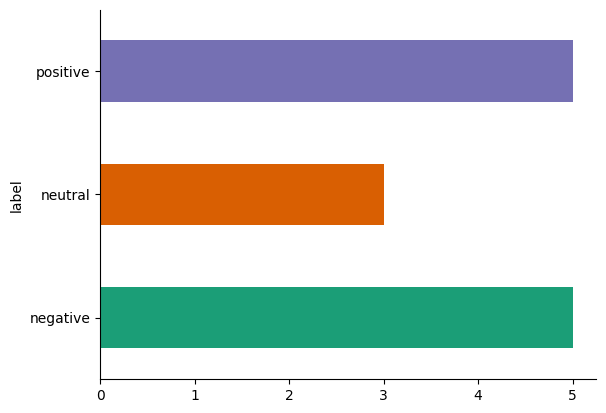

In [76]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)